In [1]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [564]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 10

In [2]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [3]:
reset_graph()

x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y + 2

In [4]:
f

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [5]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)

42


In [6]:
sess.close()

In [7]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

In [8]:
result

42

In [9]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    result = f.eval()

In [10]:
result

42

In [11]:
x1 = tf.Variable(1)

In [12]:
x1

In [13]:
x1.graph is tf.get_default_graph()

True

In [14]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = y * 3

In [15]:
with tf.Session() as sess:
    print(y.eval())
    print(z.eval())

10
30


In [16]:
with tf.Session() as sess:
    y_val, z_val = sess.run([y, z])
    print(y_val)
    print(z_val)

10
30


# Linear Regression -- normal equation

In [17]:
from sklearn.datasets import fetch_california_housing

In [18]:
housing = fetch_california_housing()

In [19]:
type(housing)

sklearn.datasets.base.Bunch

In [20]:
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [21]:
attributes = housing['data']
responses  = housing['target']

In [22]:
num_case, num_attri = attributes.shape[0], attributes.shape[1]

Pad a bias column to the original attributes

In [23]:
attributes = np.c_[np.ones(num_case), attributes]

In [24]:
attributes.shape

(20640, 9)

In [25]:
x = tf.constant(attributes, dtype=np.float64, name = 'x')
y = tf.constant(responses.reshape(-1, 1), dtype=np.float64, name = 'y')
x_transpose = tf.transpose(x)

theta = tf.matmul(tf.matrix_inverse(tf.matmul(x_transpose, x)), tf.matmul(x_transpose, y))

In [26]:
with tf.Session() as sess:
    theta_value = theta.eval()

In [27]:
theta_value

array([[ -3.69419202e+01],
       [  4.36693293e-01],
       [  9.43577803e-03],
       [ -1.07322041e-01],
       [  6.45065694e-01],
       [ -3.97638942e-06],
       [ -3.78654265e-03],
       [ -4.21314378e-01],
       [ -4.34513755e-01]])

# Gradient Descent

When using Gradient Descent, remember that it is important to first normalize the input feature vectors, or else training may be
much slower. You can do this using TensorFlow, NumPy, Scikit-Learn’s StandardScaler, or any other solution you prefer.

In [28]:
reset_graph()

In [29]:
n_epochs = 1000
learning_rate = 0.01

In [30]:
housing = fetch_california_housing()

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
attributes = housing['data']

In [34]:
attributes_scaled = scaler.fit_transform(attributes)

In [35]:
attributes

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ..., 
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [36]:
attributes_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ..., 
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [37]:
attributes_scaled_bias = np.c_[np.ones(attributes_scaled.shape[0]), attributes_scaled]

In [38]:
x = tf.constant(attributes_scaled_bias, dtype=np.float64, name = 'x')
y = tf.constant(responses.reshape(-1,1), dtype = np.float64, name = 'y')

initialize theta to randomly generated variables

In [39]:
theta = tf.Variable(tf.random_uniform([num_attri+1, 1], minval=-1, maxval=1, dtype=np.float64), name = 'theta')

make prediction

In [40]:
y_pred = tf.matmul(x, theta, name = 'predictions')

evaluate error

In [41]:
error = y_pred - y

evaluate mean square error

In [42]:
mse = tf.reduce_mean(tf.square(error), name='mse')

explicitly write up the gradient formula of least square

In [43]:
gradient = 1 / num_case * tf.matmul(tf.transpose(attributes_scaled_bias), error)

explicitly write up the update function of theta based on gradient

In [44]:
theta_update_fcn = tf.assign(theta, theta - learning_rate * gradient)

In [45]:
init = tf.global_variables_initializer()

In [46]:
with tf.Session() as sess:
    sess.run(init)
    
    # loop over epochs
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(theta_update_fcn)
    
    # after loop through the gradient descent, we need to retrieve the final result
    best_theta = theta.eval()

Epoch 0 MSE = 11.0031079788
Epoch 100 MSE = 2.10834437583
Epoch 200 MSE = 0.817490857419
Epoch 300 MSE = 0.600806986029
Epoch 400 MSE = 0.557634395406
Epoch 500 MSE = 0.546304478522
Epoch 600 MSE = 0.541798271912
Epoch 700 MSE = 0.539099119959
Epoch 800 MSE = 0.537059554334
Epoch 900 MSE = 0.535373399804


### autodiff -- gradient

In [47]:
reset_graph()

In [48]:
n_epochs = 1000
learning_rate = 0.01

In [49]:
housing = fetch_california_housing()

In [50]:
attributes = housing['data']
responses  = housing['target']

In [51]:
scaler = StandardScaler()

In [52]:
attributes_scaled = scaler.fit_transform(attributes)

In [53]:
attributes_scaled_bias = np.c_[np.ones(attributes.shape[0]), attributes_scaled]

In [54]:
x = tf.constant(attributes_scaled_bias, dtype=np.float64, name = 'x')
y = tf.constant(responses.reshape(-1, 1), dtype=np.float64, name = 'y')

In [55]:
theta = tf.Variable(tf.random_uniform([attributes.shape[1]+1, 1], minval=-1, maxval=1, dtype=np.float64), name='theta')

In [56]:
y_pred = tf.matmul(x, theta)

In [57]:
error = y - y_pred

In [58]:
mse = tf.reduce_mean(tf.square(error), name='mse')

#### to call autodiff route

In [59]:
gradient = tf.gradients(mse, [theta])[0]

In [60]:
theta_update_fcn = tf.assign(theta, theta - learning_rate * gradient)

In [61]:
init = tf.global_variables_initializer()

In [62]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print('Epoch', epoch, 'mse=', mse.eval())
        sess.run(theta_update_fcn)
    
    best_theta = theta.eval()

Epoch 0 mse= 11.0031079788
Epoch 100 mse= 0.813470400415
Epoch 200 mse= 0.557380700183
Epoch 300 mse= 0.541774802194
Epoch 400 mse= 0.537052763308
Epoch 500 mse= 0.533932146689
Epoch 600 mse= 0.531630330629
Epoch 700 mse= 0.529908596324
Epoch 800 mse= 0.5286142086
Epoch 900 mse= 0.527636731216


In [63]:
print("Best theta:")
print(best_theta)

Best theta:
[[ 2.06855816]
 [ 0.76714103]
 [ 0.12090056]
 [-0.12155242]
 [ 0.17523689]
 [-0.00291143]
 [-0.0381756 ]
 [-0.94287649]
 [-0.90500552]]


One small exercise to use autodiff: How could you find the partial derivatives of the following function with regards to a and b?

In [64]:
def my_func(a, b):
    z = 0
    for i in range(100):
        z = a * np.cos(z + i) + z * np.sin(b - i)
    return z

Set a = 0.2 and b = 0.3, generate the true z value accumulated for 100 steps

In [65]:
my_func(0.2, 0.3)

-0.21253923284754914

We use tf to evaluate z value in same setting and also attempt to find the gradient using autodiff

In [66]:
reset_graph()

In [67]:
a = tf.Variable(0.2, name = 'a')
b = tf.Variable(0.3, name = 'b')
z = tf.constant(0.0, name = 'z0')

simulate z value accumulated for 100 steps

In [68]:
for i in range(100):
    z = a * tf.cos(z + i) + z * tf.sin(b - i)

In [69]:
init = tf.global_variables_initializer()

In [70]:
grads = tf.gradients(z, [a, b])

Let's compute the function at $a=0.2$ and $b=0.3$, and the partial derivatives at that point with regards to $a$ and with regards to $b$:

In [71]:
with tf.Session() as sess:
    sess.run(init)
    print(z.eval())
    print('partial derivatives of z wrt a and b are', sess.run(grads))

-0.212537
partial derivatives of z wrt a and b are [-1.1388494, 0.19671395]


## Gradient Descent using optimizers

In [72]:
reset_graph()

In [73]:
housing = fetch_california_housing()

In [74]:
attributes = housing['data']

In [75]:
scaler = StandardScaler()

In [76]:
attributes_scaled = scaler.fit_transform(attributes)

In [77]:
attributes_scaled_bias = np.c_[np.ones(attributes.shape[0]), attributes_scaled]

In [78]:
responses = housing['target']

In [79]:
x = tf.constant(attributes_scaled_bias, dtype=np.float64, name='x')
y = tf.constant(responses.reshape(-1, 1), dtype=np.float64, name = 'y')

In [80]:
theta = tf.Variable(tf.random_uniform([attributes_scaled_bias.shape[1], 1], minval=-1, maxval=1, dtype=np.float64), name='theta')

In [81]:
y_pred = tf.matmul(x, theta, name='predictions')

In [82]:
error = y_pred - y

In [83]:
mse = tf.reduce_mean(tf.square(error), name='mse')

We don't need to specify theta update formula, instead an optimizer needs to be assigned

In [84]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

In [85]:
theta_update_fcn = optimizer.minimize(mse)

In [86]:
init = tf.global_variables_initializer()

In [87]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print('Epoch:', epoch, 'MSE=', mse.eval())
        sess.run(theta_update_fcn)
    
    best_theta = theta.eval()

Epoch: 0 MSE= 11.0031079788
Epoch: 100 MSE= 0.813470420678
Epoch: 200 MSE= 0.5573807019
Epoch: 300 MSE= 0.54177480263
Epoch: 400 MSE= 0.537052763637
Epoch: 500 MSE= 0.533932146986
Epoch: 600 MSE= 0.531630330895
Epoch: 700 MSE= 0.529908596557
Epoch: 800 MSE= 0.5286142088
Epoch: 900 MSE= 0.527636731387


In [88]:
print("Best theta:")
print(best_theta)

Best theta:
[[ 2.06855816]
 [ 0.76714103]
 [ 0.12090056]
 [-0.12155241]
 [ 0.17523689]
 [-0.00291143]
 [-0.0381756 ]
 [-0.94287649]
 [-0.90500552]]


### use momentum optimizer to replace gradient descent optimizer

In [89]:
tf.reset_default_graph()

In [90]:
x = tf.constant(attributes_scaled_bias, dtype=np.float64, name='x')
y = tf.constant(responses.reshape(-1, 1), dtype=np.float64, name='y')
theta = tf.Variable(tf.random_uniform([attributes_scaled_bias.shape[1],1], minval=-1, maxval=1, dtype=np.float64), name='theta')

In [91]:
y_pred = tf.matmul(x, theta, name='predictions')
error = y - y_pred
mse = tf.reduce_mean(tf.square(error), name='mse')

In [92]:
optimizer_momentum = tf.train.MomentumOptimizer(learning_rate = learning_rate, momentum = 0.9)

In [93]:
theta_update_fcn_momentum = optimizer_momentum.minimize(mse)

In [94]:
init = tf.global_variables_initializer()

In [95]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print('Epoch', epoch, 'MSE=', mse.eval())
        sess.run(theta_update_fcn_momentum)
    
    best_theta = theta.eval()

Epoch 0 MSE= 5.86637790217
Epoch 100 MSE= 0.530601781519
Epoch 200 MSE= 0.524835305627
Epoch 300 MSE= 0.524383977054
Epoch 400 MSE= 0.524329274891
Epoch 500 MSE= 0.524322087855
Epoch 600 MSE= 0.524321132806
Epoch 700 MSE= 0.524321005702
Epoch 800 MSE= 0.524320988783
Epoch 900 MSE= 0.52432098653


In [96]:
print("Best theta:")
print(best_theta)

Best theta:
[[ 2.06855817]
 [ 0.8296116 ]
 [ 0.11875023]
 [-0.2655123 ]
 [ 0.30568416]
 [-0.00450342]
 [-0.03932598]
 [-0.89990327]
 [-0.87055772]]


# Feeding data to the training algorithm

## Placeholder nodes -- mini batch

They are typically used to pass the training data to TensorFlow during training.

In [97]:
reset_graph()

In [98]:
n_epochs = 1000
learning_rate = 0.01

In [99]:
housing = fetch_california_housing()
attributes = housing['data']
responses  = housing['target']
scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes)
attributes_scaled_bias = np.c_[np.ones(attributes.shape[0]), attributes_scaled]

n_attr = attributes_scaled_bias.shape[1]
n_case = attributes_scaled_bias.shape[0]

In [100]:
theta = tf.Variable(tf.random_uniform([n_attr, 1], minval=-1, maxval=1, dtype=np.float64), name='theta')

In [101]:
x = tf.placeholder(tf.float64, shape=(None, n_attr), name='x')
y = tf.placeholder(tf.float64, shape=(None, 1), name='y')

In [102]:
y_pred = tf.matmul(x, theta, name='prediction')
error  = y - y_pred
mse = tf.reduce_mean(tf.square(error), name='mse')

In [103]:
#optimizer_momentum = tf.train.MomentumOptimizer(learning_rate = learning_rate, momentum = 0.9)
#theta_update_fcn_momentum = optimizer_momentum.minimize(mse)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
theta_update_fcn = optimizer.minimize(mse)

In [104]:
batch_size = 100
n_batches = int(np.ceil(n_case / batch_size))

In [105]:
def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)
    idx = np.random.randint(n_case, size = batch_size)
    x_batch = attributes_scaled_bias[idx]
    y_batch = responses.reshape(-1, 1)[idx]
    return x_batch, y_batch

In [106]:
init = tf.global_variables_initializer()

In [107]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        '''
        if epoch % 100 == 0:
            print('Epoch', epoch, 'MSE=', mse.eval())
        '''
        for batch_index in range(n_batches):
            x_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(theta_update_fcn, feed_dict={x: x_batch, y:y_batch})
            #sess.run(theta_update_fcn_momentum, feed_dict={x: x_batch, y:y_batch})
    
    best_theta = theta.eval()

In [108]:
best_theta

array([[ 2.07144805],
       [ 0.84620119],
       [ 0.11558533],
       [-0.2683583 ],
       [ 0.32982769],
       [ 0.00608358],
       [ 0.070529  ],
       [-0.87988604],
       [-0.86342546]])

# Saving and restoring a model

In [156]:
reset_graph()

In [157]:
n_epochs = 1000
learning_rate = 0.01

In [158]:
housing = fetch_california_housing()
attributes = housing['data']
responses  = housing['target']
scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes)
attributes_scaled_bias = np.c_[np.ones(attributes.shape[0]), attributes_scaled]

n_attr = attributes_scaled_bias.shape[1]
n_case = attributes_scaled_bias.shape[0]

In [159]:
x = tf.constant(attributes_scaled_bias, dtype=np.float64, name='x')
y = tf.constant(responses.reshape(-1, 1), dtype=np.float64, name='y')
theta = tf.Variable(tf.random_uniform([n_attr,1], minval=-1, maxval=1, dtype=np.float64), name='theta')
y_pred = tf.matmul(x, theta, name='predictions')
error  = y - y_pred
mse  = tf.reduce_mean(tf.square(error), name='mse')
optimizer_gd = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
theta_update_fcn_optimizier_gd = optimizer_gd.minimize(mse)
init = tf.global_variables_initializer()

activate saver to store the model trained

In [160]:
saver = tf.train.Saver()

In [161]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print('Epoch', epoch, 'MSE:',mse.eval())
            save_path = saver.save(sess, './stored_models/housing_linear_reg.ckpt')
        sess.run(theta_update_fcn_optimizier_gd)
    
    best_theta = theta.eval()
    save_path = saver.save(sess, './stored_models/housing_linear_reg_final.ckpt')

Epoch 0 MSE: 11.0031079788
Epoch 100 MSE: 0.813470420678
Epoch 200 MSE: 0.5573807019
Epoch 300 MSE: 0.54177480263
Epoch 400 MSE: 0.537052763637
Epoch 500 MSE: 0.533932146986
Epoch 600 MSE: 0.531630330895
Epoch 700 MSE: 0.529908596557
Epoch 800 MSE: 0.5286142088
Epoch 900 MSE: 0.527636731387


In [162]:
best_theta

array([[ 2.06855816],
       [ 0.76714103],
       [ 0.12090056],
       [-0.12155241],
       [ 0.17523689],
       [-0.00291143],
       [-0.0381756 ],
       [-0.94287649],
       [-0.90500552]])

load the model trained from previous run

In [163]:
with tf.Session() as sess:
    saver.restore(sess, './stored_models/housing_linear_reg_final.ckpt')
    best_theta_restored = theta.eval()

In [164]:
best_theta_restored

array([[ 2.06855816],
       [ 0.76714103],
       [ 0.12090056],
       [-0.12155241],
       [ 0.17523689],
       [-0.00291143],
       [-0.0381756 ],
       [-0.94287649],
       [-0.90500552]])

Returns True if two arrays are element-wise equal within a tolerance.

In [165]:
np.allclose(best_theta, best_theta_restored)

True


By default the saver also saves the graph structure itself in a second file with the extension .meta. You can use the function tf.train.import_meta_graph() to restore the graph structure. This function loads the graph into the default graph and returns a Saver that can then be used to restore the graph state (i.e., the variable values):

In [166]:
reset_graph()

this loads the graph structure

In [167]:
saver = tf.train.import_meta_graph('./stored_models/housing_linear_reg_final.ckpt.meta')

get the variable of interested from graph stored

In [168]:
theta = tf.get_default_graph().get_tensor_by_name("theta:0")

In [169]:
with tf.Session() as sess:
    saver.restore(sess, './stored_models/housing_linear_reg_final.ckpt')
    best_theta_restored = theta.eval()

In [170]:
np.allclose(best_theta_restored, best_theta)

True

In [171]:
best_theta_restored

array([[ 2.06855816],
       [ 0.76714103],
       [ 0.12090056],
       [-0.12155241],
       [ 0.17523689],
       [-0.00291143],
       [-0.0381756 ],
       [-0.94287649],
       [-0.90500552]])

This means that you can import a pretrained model without having to have the corresponding Python code to build the graph. This is very handy when you keep tweaking and saving your model: you can load a previously saved model without having to search for the version of the code that built it.

# Visualize graph

## inside jupyter notebook

In [172]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [173]:
show_graph(tf.get_default_graph())

# Name Scope -- create name scopes to group related nodes

In [255]:
reset_graph()

In [256]:
housing = fetch_california_housing()

In [257]:
attributes = housing['data']
responses  = housing['target']

In [258]:
scaler = StandardScaler()

In [259]:
attributes_scaled = scaler.fit_transform(attributes)
attributes_scaled_bias = np.c_[np.ones(attributes_scaled.shape[0]), attributes_scaled]

In [260]:
n_attr = attributes_scaled_bias.shape[1]
n_case = attributes_scaled_bias.shape[0]

In [261]:
#x = tf.placeholder(tf.float32, shape=(None, n_attr), name='x')
#y = tf.placeholder(tf.float32, shape=(None, 1), name = 'y')
x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32, name = 'y')

In [262]:
theta = tf.Variable(tf.random_uniform([n_attr, 1], minval=-1, maxval=1), name='theta')

In [263]:
y_pred = tf.matmul(x, theta, name='predictions')

create a local node ('loss') that contains two units -- error and mse

In [264]:
with tf.name_scope('loss') as scope:
    error = y - y_pred
    mse   = tf.reduce_mean(tf.square(error), name='mse')

#error = y - y_pred
#mse   = tf.reduce_mean(tf.square(error), name='mse')

In [265]:
optimizer_gd = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
theta_update_fcn_optimizer_gd = optimizer_gd.minimize(mse)

In [266]:
init = tf.global_variables_initializer()

In [267]:
def fetch_batch(epoch, batch_idx, batch_size):
    np.random.seed(epoch*batch_idx+batch_size)
    idx = np.random.randint(n_case, size=batch_size)
    x_batch = attributes_scaled_bias[idx]
    y_batch = responses.reshape(-1, 1)[idx]
    return x_batch, y_batch

In [268]:
n_batches = int(np.ceil(n_case / batch_size))

In [269]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_idx in range(n_batches):
            x_batch, y_batch = fetch_batch(epoch, batch_idx, batch_size)
            sess.run(theta_update_fcn_optimizer_gd, feed_dict={x:x_batch, y:y_batch})
    
    best_theta = theta.eval()

In [270]:
best_theta

array([[ 2.07189703],
       [ 0.80816871],
       [ 0.12766746],
       [-0.24579723],
       [ 0.35000601],
       [-0.00800055],
       [-0.16676177],
       [-0.88806784],
       [-0.86964667]], dtype=float32)

In [271]:
show_graph(tf.get_default_graph())

In [290]:
print(error.op)

name: "loss/sub"
op: "Sub"
input: "y"
input: "predictions"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}



In [291]:
print(error.op.name)

loss/sub


In [292]:
print(mse.op)

name: "loss/mse"
op: "Mean"
input: "loss/Square"
input: "loss/range"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "Tidx"
  value {
    type: DT_INT32
  }
}
attr {
  key: "keep_dims"
  value {
    b: false
  }
}



In [293]:
print(mse.op.name)

loss/mse


another example

In [294]:
reset_graph()

In [295]:
a1 = tf.Variable(1, name='a')
a2 = tf.Variable(1, name='a')

In [296]:
with tf.name_scope('param') as scope:
    a3 = tf.Variable(1, name = 'a')

In [297]:
with tf.name_scope('param') as scope:
    a4 = tf.Variable(1, name = 'a')

In [300]:
for node in (a1, a2, a3, a4):
    print(node.op.name)

a
a_1
param/a
param_1/a


Note that when you create a node, TensorFlow checks whether its name already exists, and if it does it
appends an underscore followed by an index to make the name unique. So the first ReLU contains nodes
named "weights", "bias", "z", and "relu" (plus many more nodes with their default name, such as
"MatMul"); the second ReLU contains nodes named "weights_1", "bias_1", and so on; the third ReLU
contains nodes named "weights_2", "bias_2", and so on.

# Modularity

In [326]:
reset_graph()

In [327]:
n_features = 3

In [328]:
x = tf.placeholder(tf.float32, shape=(None, n_features), name = 'x')

In [329]:
w1 = tf.Variable(tf.random_normal((n_features, 1)), name='weight_1')
w2 = tf.Variable(tf.random_normal((n_features, 1)), name='weight_2')

In [330]:
b1 = tf.Variable(0.0, name = 'bias_1')
b2 = tf.Variable(0.0, name = 'bias_2')

In [331]:
z_1 = tf.add(tf.matmul(x, w1), b1, name='z1')
z_2 = tf.add(tf.matmul(x, w2), b2, name='z2')

In [332]:
relu_1 = tf.maximum(z_1, 0., name="relu1")
relu_2 = tf.maximum(z_2, 0., name="relu2")

In [333]:
output = tf.add(relu_1, relu_2, name="output")

In [334]:
with tf.Session() as sess:
    print(output)

Tensor("output:0", shape=(?, 1), dtype=float32)


In [335]:
show_graph(tf.get_default_graph())

modularize ReLu

In [400]:
reset_graph()

In [401]:
def relu(x):
    n_attr = int(x.get_shape()[1])
    w = tf.Variable(tf.random_normal((n_attr, 1)), name='weight')
    b = tf.Variable(0.0, name='bias')
    z = tf.add(tf.matmul(x,w), b, 'z')
    relu_val = tf.maximum(0.0, z, name='relu')
    return relu_val

In [402]:
n_features = 3

In [403]:
x = tf.placeholder(tf.float32, shape=(None, n_features), name='x')

In [404]:
relus = [relu(x) for i in range(5)]

In [405]:
relu_outcome = tf.add_n(relus, name='relu')

In [406]:
show_graph(tf.get_default_graph())

## modularity with name_scope (node)

In [438]:
reset_graph()

In [439]:
n_features = 3

In [440]:
def relu(x):
    with tf.name_scope('ReLu') as scope:
        n_attr = int(x.get_shape()[1])
        w = tf.Variable(tf.random_normal((n_attr, 1)), name='weight')
        b = tf.Variable(0.0, name='bias')
        z = tf.add(tf.matmul(x,w), b, name='score')
        relu_result = tf.maximum(0., z, name='max_relu')
        return relu_result    

In [441]:
x = tf.placeholder(tf.float32, shape=(None, n_features), name='x')

In [442]:
relus = [relu(x) for i in range(5)]

In [443]:
relu_val = tf.add_n(relus, name='relu_output')

In [444]:
show_graph(tf.get_default_graph())

# Sharing Variables

Share a variable between various components of graph.

For example, suppose you want to control
the ReLU threshold (currently hardcoded to 0) using a shared threshold variable for all ReLUs. You
could just create that variable first, and then pass it to the relu() function:

### Sharing a threshold variable the classic way

Define threshold outside of the relu() function then passing it as a parameter:

In [465]:
reset_graph()

In [466]:
n_features = 3

In [467]:
x = tf.placeholder(tf.float32, shape=(None, n_features), name='x')

In [468]:
def relu(x, threshold):
    with tf.name_scope('relu'):
        n_attr = int(x.get_shape()[1])
        w = tf.Variable(tf.random_normal((n_attr, 1)), name='weight')
        b = tf.Variable(0.0, name='bias')
        z = tf.add(tf.matmul(x, w), b, name='score')
        relu_result = tf.maximum(threshold, z, 'relu_output')
        return relu_result

In [469]:
threshold = tf.Variable(0.0, dtype=np.float32, name='threshold')

In [470]:
relus = [relu(x, threshold) for i in range(5)]

In [471]:
relu_output = tf.add_n(relus, name='relu_output')

However, if there are many shared parameters such as this one, it will be painful to have to pass them
around as parameters all the time. Many people create a Python dictionary containing all the variables in
their model, and pass it around to every function.

Others create a class for each module (e.g., a ReLU class using class variables to handle the shared parameter).


Yet another option is to set the shared variable as an attribute of the relu() function upon the first call.

### sharing variable -- option 1

In [482]:
reset_graph()

In [483]:
n_features = 3

In [484]:
x = tf.placeholder(tf.float32, shape = (None, n_features), name='x')

In [485]:
def relu(x):
    with tf.name_scope('relu'):
        if not hasattr(relu, 'threshold'):
            relu.threshold = tf.Variable(0.0, name='threshold')
        n_attr = int(x.get_shape()[1])
        w = tf.Variable(tf.random_normal((n_attr, 1)), name='weight')
        b = tf.Variable(0.0, name='bias')
        z = tf.add(tf.matmul(x, w), b, name='score')
        relu_result = tf.maximum(relu.threshold, z, name='relu_output')
        return relu_result

difference:
1. relu_result = tf.maximum(relu.threshold, z, name='relu_output')
2. relu_result = tf.maximum(threshold, z, name='relu_output')

In [486]:
relus = [relu(x) for i in range(5)]
relu_output = tf.add_n(relus, name='relu_result')

### sharing variable -- option 2

Use the get_variable() function to create the shared variable if it does not exist yet, or reuse it if it already exists. The desired behavior (creating or reusing) is controlled by an attribute of the current variable_scope(). 

In [487]:
reset_graph()

First, create a variable_scope() with specified name function that calls sharing variables. The
following code will create a variable named "relu/threshold" (as a scalar, since shape=(), and using
0.0 as the initial value)

In [491]:
with tf.variable_scope('relu'):
    threshold = tf.get_variable('threshold', shape=(), initializer=tf.constant_initializer(0.0))

Alternatively, if the variable has already been created by an earlier call to get_variable(), this code will
raise an exception. This behavior prevents reusing variables by mistake. If you want to reuse a variable,
you need to explicitly say so by setting the variable scope’s reuse attribute to True (in which case you
don’t have to specify the shape or the initializer):

Note:
This code will fetch the existing "relu/threshold" variable, or raise an exception if it does not exist or
if it was not created using get_variable()

In [492]:
with tf.variable_scope('relu', reuse = True):
    threshold = tf.get_variable('threshold')

start from scratch, not use name_scope() function anymore, instead, we use variable_scope()

In [493]:
reset_graph()

In [494]:
def relu(x):
    with tf.variable_scope('relu', reuse = True):
        threshold = tf.get_variable('threshold')
        n_attr = int(x.get_shape()[1])
        w = tf.Variable(tf.random_normal((n_attr, 1)), name='weight')
        b = tf.Variable(0.0, name='bias')
        z = tf.add(tf.matmul(x, w), b, name='score')
        relu_result = tf.maximum(threshold, z, name='relu_result')
        return relu_result

In [496]:
with tf.variable_scope('relu'):
    threshold = tf.get_variable('threshold', shape=(), initializer=tf.constant_initializer(0.0))

In [497]:
x = tf.placeholder(tf.float32, shape=(None, n_features), name='x')

In [499]:
relus = [relu(x) for i in range(5)]
relu_output = tf.add_n(relus, name='relu_output')

define threshold within relu function

In [512]:
reset_graph()

In [513]:
def relu(x):
    threshold = tf.get_variable('threshold', shape=(), initializer=tf.constant_initializer(0.0))
    n_attr = int(x.get_shape()[1])
    w = tf.Variable(tf.random_normal((n_attr, 1)), name='weight')
    b = tf.Variable(0.0, name='bias')
    z = tf.add(tf.matmul(x, w), b, name='score')
    relu_result = tf.maximum(threshold, z, name='relu_result')
    return relu_result

In [514]:
x = tf.placeholder(tf.float32, shape=(None, n_features), name='x')

In [515]:
relus = []

for relu_idx in range(5):
    with tf.variable_scope('relu', reuse = (relu_idx >= 1)) as scope:
        relu_res = relu(x)
        relus.append(relu_res)

In [516]:
relu_output = tf.add_n(relus, name='relu_output')

In [517]:
show_graph(tf.get_default_graph())

# External materials

## variable scope

In [540]:
reset_graph()

In [541]:
with tf.variable_scope('my_scope'):
    x0 = tf.get_variable('x', shape=(), initializer=tf.constant_initializer(0.0))
    x1 = tf.Variable(0.0, name = 'x')
    x2 = tf.Variable(0.0, name = 'x')

In [542]:
print(x0.op.name)
print(x1.op.name)
print(x2.op.name)

my_scope/x
my_scope/x_1
my_scope/x_2


The first variable_scope() block first creates the shared variable x0, named my_scope/x. For all operations other than shared variables (including non-shared variables), the variable scope acts like a regular name scope, which is why the two variables x1 and x2 have a name with a prefix my_scope/. Note however that TensorFlow makes their names unique by adding an index: my_scope/x_1 and my_scope/x_2.

In [543]:
with tf.variable_scope('my_scope', reuse = True):
    x3 = tf.get_variable('x')
    x4 = tf.Variable(0.0, name='x')

In [544]:
print(x3.op.name)
print(x4.op.name)

my_scope/x
my_scope_1/x


The second variable_scope() block reuses the shared variables in scope my_scope, which is why x0 is x3. Once again, for all operations other than shared variables it acts as a named scope, and since it's a separate block from the first one, the name of the scope is made unique by TensorFlow (my_scope_1) and thus the variable x4 is named my_scope_1/x.

In [546]:
with tf.variable_scope('', default_name='',reuse=True):
    x5 = tf.get_variable('my_scope/x')

In [547]:
print(x5.op.name)

my_scope/x


The third block shows another way to get a handle on the shared variable my_scope/x by creating a variable_scope() at the root scope (whose name is an empty string), then calling get_variable() with the full name of the shared variable (i.e. "my_scope/x").

## string

In [548]:
reset_graph()

In [549]:
text = np.array("Do you want some café?".split())

In [550]:
print(text)

['Do' 'you' 'want' 'some' 'café?']


In [551]:
text_tf = tf.constant(text)

In [552]:
with tf.Session() as sess:
    print(text_tf.eval())

[b'Do' b'you' b'want' b'some' b'caf\xc3\xa9?']


# Exercise 

## Logistic Regression with Mini-Batch Gradient Descent using TensorFlow

In [553]:
from sklearn.datasets import make_moons

In [554]:
m = 1000
x_moons, y_moons = make_moons(m, noise=0.1, random_state=42)

In [570]:
np.unique(y_moons)

array([0, 1], dtype=int64)

visualize dataset

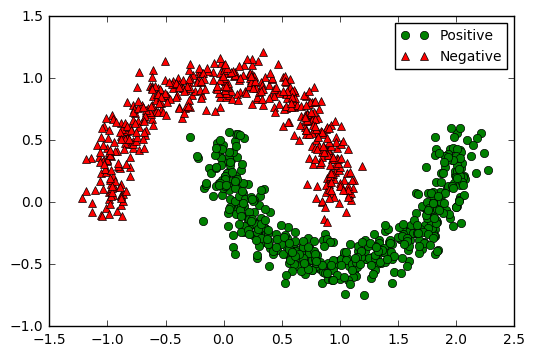

In [565]:
plt.plot(x_moons[y_moons == 1, 0], x_moons[y_moons == 1, 1], 'go', label="Positive")
plt.plot(x_moons[y_moons == 0, 0], x_moons[y_moons == 0, 1], 'r^', label="Negative")
plt.legend(loc='best');


We must not forget to add an extra bias feature ($x_0 = 1$) to every instance. For this, we just need to add a column full of 1s on the left of the input matrix $\mathbf{X}$:

In [573]:
x_moons_with_bias = np.c_[np.ones((m, 1)), x_moons]

In [576]:
x_moons_with_bias[:5]

array([[ 1.        , -0.05146968,  0.44419863],
       [ 1.        ,  1.03201691, -0.41974116],
       [ 1.        ,  0.86789186, -0.25482711],
       [ 1.        ,  0.288851  , -0.44866862],
       [ 1.        , -0.83343911,  0.53505665]])

In [577]:
y_moons = y_moons.reshape(-1, 1)


Now let's split the data into a training set and a test set:

In [579]:
train_ratio = 0.2
train_size  = int(m * train_ratio)

In [580]:
xtrain = x_moons_with_bias[:train_size]
xtest  = x_moons_with_bias[train_size:]

In [581]:
ytrain = y_moons[:train_size]
ytest  = y_moons[train_size:]

Create a small function to generate training batches. In this implementation we will just pick random instances from the training set for each batch. This means that a single batch may contain the same instance multiple times, and also a single epoch may not cover all the training instances (in fact it will generally cover only about two thirds of the instances). However, in practice this is not an issue and it simplifies the code:

In [582]:
def random_batch(x_train, y_train, batch_size):
    idx = np.random.randint(0, len(x_train), size = batch_size)
    x_batch = x_train[idx]
    y_batch = y_train[idx]
    return x_batch, y_batch

## Start to build a TF model 

In [638]:
reset_graph()

In [639]:
d_inputs = 2

Now let's build the Logistic Regression model. This model first computes a weighted sum of the inputs (just like the Linear Regression model), and then it applies the sigmoid function to the result, which gives us the estimated probability for the positive class:
$\hat{p} = h_\mathbf{\theta}(\mathbf{x}) = \sigma(\mathbf{\theta}^T \cdot \mathbf{x})$

Create placeholder to store training data

In [640]:
x = tf.placeholder(dtype = tf.float32, shape = (None, d_inputs + 1), name = 'x')

In [641]:
y = tf.placeholder(dtype = tf.float32, shape = (None, 1), name = 'y')

In [642]:
theta = tf.Variable(tf.random_uniform([d_inputs+1, 1], minval=-1, maxval=1, seed=42), name='theta')

define a logit function and y_prob

In [643]:
logit = tf.matmul(x, theta, name='logit')

In [644]:
y_prob = 1 / (1 + tf.exp(-logit))

Alternatively, TensorFlow has a nice built-in function tf.sigmoid() that we can use to simplify the last line of the previous code:

In [645]:
y_prob = tf.sigmoid(logit)

The log loss is a good cost function to use for Logistic Regression:

$J(\mathbf{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}$

Self-writen log-loss function: to avoid the overflow, we consider epsilon to stablize the calculation.

In [646]:
epsilon = 1e-7

In [647]:
loss = -tf.reduce_mean(y * tf.log(y_prob+epsilon) + (1-y) * tf.log(1-y_prob+epsilon))

TensorFlow built-in function: tf.losses.log_loss

In [648]:
loss = tf.losses.log_loss(y, y_prob)

The flow of building logistic regression:

1. create $\textbf{x}$, $\textbf{y}$ and $\theta$
2. create y_prob = logit($\textbf{x}$, $\theta$) = 1 / (1 + $\exp(-\textbf{x}\theta)$) with numerical stabilizer $\epsilon$
3. create loss function, which is cross-entropy (log-loss)
4. create an optimizer
5. create training object function -- loss function
6. initialize global variables
7. define the algorithmic settings -- epochs, batch_size, number of batches = num_case/batch_size
8. main loop to build model and make prediction

In [649]:
learning_rate = 0.01
logistic_reg_optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)

In [650]:
train_obj = logistic_reg_optimizer.minimize(loss)

In [651]:
init = tf.global_variables_initializer()

Then it is ready to train the model and use it for predictions.

In [652]:
n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

In [653]:
with tf.Session() as sess:
    sess.run(init)
    
    # 1. -- model training
    for epoch in range(n_epochs):
        for batch_idx in range(n_batches):
            x_batch, y_batch = random_batch(xtrain, ytrain, batch_size)
            sess.run(train_obj, feed_dict={x:xtrain, y:ytrain})
        
    # 2. -- after model build over batch_size for an epoch, then do the loss evaluation for test set
        loss_val = loss.eval({x:xtest, y:ytest})
        
        if epoch % 100 == 0:
            print('Epoch', epoch, '\tLoss', loss_val)
    
    # 3. -- make the prediction, y_prob_val is the final probabilistic predictions after logistic regression built.
    y_prob_val = y_prob.eval({x:xtest, y:ytest})

Epoch 0 	Loss 0.802893
Epoch 100 	Loss 0.33114
Epoch 200 	Loss 0.293561
Epoch 300 	Loss 0.277877
Epoch 400 	Loss 0.269575
Epoch 500 	Loss 0.264719
Epoch 600 	Loss 0.261695
Epoch 700 	Loss 0.259726
Epoch 800 	Loss 0.258404
Epoch 900 	Loss 0.257496


Note: Unlikely to the fetch_batch() function built above, we don't use the epoch number when generating batches, so we could just have a single for loop rather than 2 nested for loops, but it's convenient to think of training time in terms of number of epochs (i.e., roughly the number of times the algorithm went through the training set).

In [661]:
ytest_prediction = y_prob_val.squeeze()

In [662]:
ytest_prediction = 1*(ytest_prediction >= 0.5)
ytest_prediction[:10]

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

## model's precision and recall:

In [663]:
from sklearn.metrics import precision_recall_curve, roc_curve, precision_score, recall_score, roc_auc_score

In [664]:
precision_score(ytest, ytest_prediction)

0.8704156479217604

In [665]:
recall_score(ytest, ytest_prediction)

0.89898989898989901

In [667]:
roc_auc_score(ytest, ytest_prediction)

0.88390089008900896

Plot predictions

In [678]:
y_pred_idx = (y_prob_val.squeeze() >= 0.5).reshape(-1)

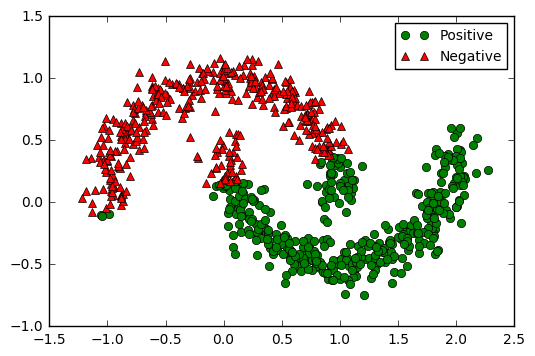

In [680]:
plt.plot(xtest[y_pred_idx, 1], xtest[y_pred_idx, 2], 'go', label="Positive")
plt.plot(xtest[~y_pred_idx, 1], xtest[~y_pred_idx, 2], 'r^', label="Negative")
plt.legend();

# self-writen tf-logistic regression model

Now let's start over, but this time we will add all the bells and whistles, as listed in the exercise:

1. Define the graph within a logistic_regression() function that can be reused easily.

2. Save checkpoints using a Saver at regular intervals during training, and save the final model at the end of training.
3. Restore the last checkpoint upon startup if training was interrupted.
4. Define the graph using nice scopes so the graph looks good in TensorBoard.
5. Add summaries to visualize the learning curves in TensorBoard.
6. Try tweaking some hyperparameters such as the learning rate or the mini-batch size and look at the shape of the learning curve.


Before we start, we will add 4 more features to the inputs: ${x_1}^2$, ${x_2}^2$, ${x_1}^3$ and ${x_2}^3$. This was not part of the exercise, but it will demonstrate how adding features can improve the model. We will do this manually, but you could also add them using sklearn.preprocessing.PolynomialFeatures.

In [881]:
xtrain_poly = np.c_[xtrain,
                    np.square(xtrain[:,1]),
                    np.square(xtrain[:,2]),
                    xtrain[:,1]**3,
                    xtrain[:,2]**3]

In [882]:
xtest_poly = np.c_[xtest,
                   np.square(xtest[:,1]),
                   np.square(xtest[:,2]),
                   xtest[:,1]**3,
                   xtest[:,2]**3]

In [883]:
reset_graph()

Now let's define the logistic_regression() function to create the graph. We will leave out the definition of the inputs X and the targets y. We could include them here, but leaving them out will make it easier to use this function in a wide range of use cases (e.g. perhaps we will want to add some preprocessing steps for the inputs before we feed them to the Logistic Regression model).

In [787]:
def logistic_regression(x, y, initializer = None, seed = 42, learning_rate = 0.01, summary_tensorboard = False):
    d_inputs = int(x.get_shape()[1])
    
    # 1. create a name_scope to contain all sub-functions
    with tf.name_scope('logistic_regression'):
        
        # -----------------------------------------------------------------------------------  #
        # 1.1 sub-function: logistic model -- quantities required for training a logistic regression
        with tf.name_scope('model'):
            # if there is no initializer is input, then use the default randomly uniform distribution
            if initializer is None:
                initializer = tf.random_uniform([d_inputs, 1], minval=-1, maxval=1)
            
            # initializer logistic weights
            theta = tf.Variable(initializer, name = 'theta')
            
            # score calculation
            score = tf.matmul(x, theta, name='score')
            
            # logit function
            y_prob = tf.sigmoid(score, name = 'sigmoid')
        
        # -----------------------------------------------------------------------------------  #
        # 1.2 sub-function: training -- the procedure for building a logistic regression
        with tf.name_scope('train'):
            loss = tf.losses.log_loss(y_prob, y, scope = 'loss')
            logistic_optimizer_gd = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
            logistic_train_obj = logistic_optimizer_gd.minimize(loss)
            # this is for retrieving information on TensorBoard
            loss_summary = tf.summary.scalar('log_loss', loss)
            
        # -----------------------------------------------------------------------------------  #
        # 1.3 sub-function: init -- initializer for activating variables assignment
        with tf.name_scope('init'):
            init = tf.global_variables_initializer()
        
        # -----------------------------------------------------------------------------------  #
        # 1.4 sub-function: saver -- to save the model in case a possible interruption
        with tf.name_scope('saver'):
            saver = tf.train.Saver()
    
    
    return y_prob, loss, logistic_train_obj, loss_summary, init, saver

Next, let's create the graph, using the logistic_regression() function. 

In [788]:
d_inputs = 6
x = tf.placeholder(tf.float32, shape=(None, d_inputs + 1), name="x")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

In [789]:
y_prob, loss, logistic_train_obj, loss_summary, init, saver = logistic_regression(x, y)


At last we can train the model! We will start by checking whether a previous training session was interrupted, and if so we will load the checkpoint and continue training from the epoch number we saved. In this example we just save the epoch number to a separate file, but in chapter 11 we will see how to store the training step directly as part of the model, using a non-trainable variable called global_step that we pass to the optimizer's minimize() method.

You can try interrupting training to verify that it does indeed restore the last checkpoint when you start it again.

In [899]:
reset_graph()

In [900]:
import os

In [901]:
def logistic_regression(x, y, initializer = None, seed = 42, learning_rate=0.01):
    d_inputs = int(x.get_shape()[1])
    
    # 1. create a name scope to contain all sub-functions
    with tf.name_scope('logistic_model'):
        if initializer is None:
            initializer = tf.random_uniform([d_inputs, 1], minval=-1, maxval=1)
        theta = tf.Variable(initializer, name='theta')
        logit = tf.matmul(x, theta, name='logit')
        y_prob = tf.sigmoid(logit)
                    
        with tf.name_scope('train'):
            loss = tf.losses.log_loss(y, y_prob, scope='loss')
            optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
            train_obj = optimizer.minimize(loss)
            loss_summary = tf.summary.scalar('log_loss', loss)
        
        with tf.name_scope('init'):
            init = tf.global_variables_initializer()
        
        with tf.name_scope('saver'):
            saver = tf.train.Saver()
        
        
    return y_prob, loss, train_obj, loss_summary, init, saver

In [902]:
checkpoint_path = './stored_models/my_logreg_model_tmp.ckpt'
checkpoint_epoch_path = checkpoint_path + '.epoch'
final_model_path = './stored_models/my_logreg_model'

In [903]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

In [904]:
x = tf.placeholder(tf.float32, shape=(None, d_inputs + 1), name="x")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

In [905]:
y_prob, loss, training_obj, loss_summary, init, saver = logistic_regression(x, y)

In [906]:
with tf.Session() as sess:
    
    if os.path.isfile(checkpoint_epoch_path):
        with open(checkpoint_epoch_path, 'rb') as f:
            start_epoch = int(f.read())
        print('train was interrupted, and it will be continued at ', start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)
        
        
    for epoch in range(start_epoch, n_epochs):
        for batch_idx in range(n_batches):
            x_batch, y_batch = random_batch(xtrain_poly, ytrain, batch_size)
            sess.run(training_obj, feed_dict={x:x_batch, y:y_batch})
        loss_val, loss_summary_str = sess.run([loss, loss_summary], feed_dict={x:xtest_poly, y:ytest})

        if epoch % 500 == 0:
            print('Epoch', epoch, '\tLoss', loss_val)

            # save the temporary model
            saver.save(sess, checkpoint_path)

            with open(checkpoint_epoch_path, 'wb') as f:
                f.write(b"%d" % (epoch + 1))

    saver.save(sess, final_model_path)
    y_prob_val = y_prob.eval(feed_dict={x: xtest_poly, y: ytest})
    os.remove(checkpoint_epoch_path)

Epoch 0 	Loss 0.872065
Epoch 500 	Loss 0.167791
Epoch 1000 	Loss 0.115962
Epoch 1500 	Loss 0.0913622
Epoch 2000 	Loss 0.0766147
Epoch 2500 	Loss 0.0667381
Epoch 3000 	Loss 0.0595593
Epoch 3500 	Loss 0.0542204
Epoch 4000 	Loss 0.0499758
Epoch 4500 	Loss 0.0465187
Epoch 5000 	Loss 0.0436818
Epoch 5500 	Loss 0.0412535
Epoch 6000 	Loss 0.0391425
Epoch 6500 	Loss 0.0373492
Epoch 7000 	Loss 0.0358479
Epoch 7500 	Loss 0.0344079
Epoch 8000 	Loss 0.0332076
Epoch 8500 	Loss 0.0320363
Epoch 9000 	Loss 0.0309747
Epoch 9500 	Loss 0.030061
Epoch 10000 	Loss 0.0292231


In [913]:
y_pred =  (y_prob_val.squeeze() >= 0.5)

In [919]:
recall_score(y_pred, ytest)

0.99492385786802029

In [920]:
precision_score(y_pred, ytest)

0.98989898989898994

In [921]:
roc_auc_score(y_pred, ytest)

0.99253582055962586

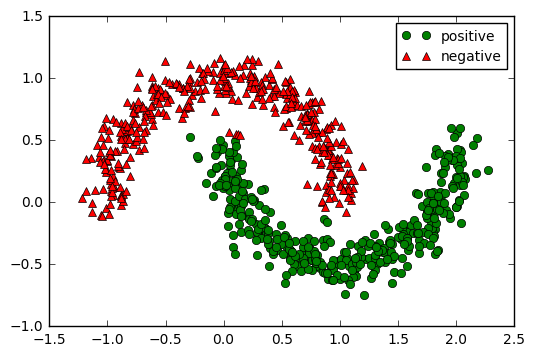

In [918]:
plt.plot(xtest[y_pred, 1], xtest[y_pred, 2], 'go', label = 'positive')
plt.plot(xtest[~y_pred, 1], xtest[~y_pred, 2], 'r^', label = 'negative')
plt.legend(loc='best')

## Gridsearch over hyper-parameters

batch_size and learning_rate, etc


The reciprocal() function from SciPy's stats module returns a random distribution that is commonly used when you have no idea of the optimal scale of a hyperparameter. See the exercise solutions for chapter 2 for more details.

In [952]:
reset_graph()
#os.remove(checkpoint_epoch_path)

In [953]:
from scipy.stats import reciprocal

In [954]:
n_search_iterations = 10

In [955]:
checkpoint_path = './stored_models/my_logreg_model_tmp.ckpt'
checkpoint_epoch_path = checkpoint_path + '.epoch'
final_model_path = './stored_models/my_logreg_model'

In [959]:
for iteration in range(n_search_iterations):
    
    
    
    # 1. randomly generate values for hyper-parameters
    batch_size = np.random.randint(1, 100)
    learning_rate = reciprocal(0.0001, 0.1).rvs(random_state=iteration)
    d_inputs = 2 + 4
    
    # 2. display training iteration
    print('Iteration--------------------------', iteration)
    print('   batch size: ', batch_size)
    print('   learning_rate: ', learning_rate)
    
    # 3. reset the computing graph
    reset_graph()
    
    # 4. re-define the x and y
    x = tf.placeholder(dtype = tf.float32, shape = (None, d_inputs+1), name = 'x')
    y = tf.placeholder(dtype = tf.float32, shape = (None , 1), name = 'y')
    
    # 5. re-call logistic regression function
    y_prob, loss, train_obj, loss_summary, init, saver = logistic_regression(x, y)
    
    # 6. define the number of epochs and batches
    n_epochs = 10001
    n_batches = int(np.ceil(m / batch_size))
    
    # 7. re-run the tf.Session() to build model and make prediction
    with tf.Session() as sess:
        d_inputs = int(x.get_shape()[1])
        
        if os.path.isfile(checkpoint_epoch_path):
            with open(checkpoint_epoch_path, 'rb') as f:
                start_epoch = int(f.read())
                print('   training was interrupt and continue at epoch ', start_epoch)
                saver.restore(sess, checkpoint_path)
        else:
            start_epoch = 0
            sess.run(init)
        
        for epoch in range(start_epoch, n_epochs):
            for batch_idx in range(n_batches):
                x_batch, y_batch = random_batch(xtrain_poly, ytrain, batch_size)
                sess.run(train_obj, feed_dict={x:x_batch, y:y_batch})
            
            loss_val, loss_summary_str = sess.run([loss, loss_summary], feed_dict={x:xtest_poly, y:ytest})
            if epoch % 2000 == 0:
                print('   Epoch', epoch, '\tLoss', loss_val)
                saver.save(sess, checkpoint_path)
                with open(checkpoint_epoch_path, 'wb') as f:
                    f.write(b'%d'%(epoch+1))
        
        saver.save(sess, final_model_path)
        ytest_prob_val = y_prob.eval(feed_dict={x:xtest_poly, y:ytest})
        os.remove(checkpoint_epoch_path)
        
        ytest_pred = (ytest_prob_val > 0.5)
        print('   precision: ', precision_score(ytest_pred, ytest))
        print('   recall: ', recall_score(ytest_pred, ytest))
        print('   AUC: ', roc_auc_score(ytest_pred, ytest))

Iteration-------------------------- 0
   batch size:  75
   learning_rate:  0.00443037524522
   training was interrupt and continue at epoch  6501
   Epoch 8000 	Loss 0.041291
   Epoch 10000 	Loss 0.0361307
   precision:  0.989898989899
   recall:  0.992405063291
   AUC:  0.991264260041
Iteration-------------------------- 1
   batch size:  17
   learning_rate:  0.00178264971514
   Epoch 0 	Loss 0.590242
   Epoch 2000 	Loss 0.0396623
   Epoch 4000 	Loss 0.0267188
   Epoch 6000 	Loss 0.0214329
   Epoch 8000 	Loss 0.0186457
   Epoch 10000 	Loss 0.0166903
   precision:  1.0
   recall:  0.994974874372
   AUC:  0.997487437186
Iteration-------------------------- 2
   batch size:  2
   learning_rate:  0.00203228544324
   Epoch 0 	Loss 0.424888
   Epoch 2000 	Loss 0.0130647
   Epoch 4000 	Loss 0.00978937
   Epoch 6000 	Loss 0.00812631
   Epoch 8000 	Loss 0.00726968
   Epoch 10000 	Loss 0.00661849
   precision:  1.0
   recall:  0.994974874372
   AUC:  0.997487437186
Iteration--------------------